# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | whitehorse
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | labytnangi
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | ourilandia do norte
City not found. Skipping...
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | aq qayeh
City not found. Skipping...
Processing Record 10 of Set 1 | hihifo
City not found. Skipping...
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | balikpapan
Processing Record 14 of Set 1 | hassi messaoud
Processing Record 15 of Set 1 | chibougamau
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | dunhua
Processing Record 19 of Set 1 | lazaro cardenas
Processing Record 20 of Set 1 | olonkinbyen
Process

Processing Record 40 of Set 4 | plastun
Processing Record 41 of Set 4 | dadukou
Processing Record 42 of Set 4 | zakynthos
Processing Record 43 of Set 4 | polyarnyy
Processing Record 44 of Set 4 | vila franca do campo
Processing Record 45 of Set 4 | baluseni
Processing Record 46 of Set 4 | tibati
Processing Record 47 of Set 4 | forster
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | quellon
Processing Record 0 of Set 5 | burg unter-falkenstein
City not found. Skipping...
Processing Record 1 of Set 5 | saldanha
Processing Record 2 of Set 5 | levuka
Processing Record 3 of Set 5 | oum hadjer
Processing Record 4 of Set 5 | fisterra
Processing Record 5 of Set 5 | fort st. john
Processing Record 6 of Set 5 | buala
Processing Record 7 of Set 5 | afaahiti
Processing Record 8 of Set 5 | chivhu
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | port hedland
Processing Record 11 of Set 5 | vilyuchinsk
Processing Record 12 of Set 5 | susuman
Proces

Processing Record 30 of Set 8 | greenville
Processing Record 31 of Set 8 | weno
Processing Record 32 of Set 8 | kabalo
Processing Record 33 of Set 8 | tunja
Processing Record 34 of Set 8 | torghay
Processing Record 35 of Set 8 | rio gallegos
Processing Record 36 of Set 8 | agaro
Processing Record 37 of Set 8 | karratha
Processing Record 38 of Set 8 | nasiriyah
Processing Record 39 of Set 8 | labasa
Processing Record 40 of Set 8 | manokwari
Processing Record 41 of Set 8 | shagonar
Processing Record 42 of Set 8 | kailua-kona
Processing Record 43 of Set 8 | kulia village
City not found. Skipping...
Processing Record 44 of Set 8 | ayorou
Processing Record 45 of Set 8 | penalva
Processing Record 46 of Set 8 | sarangani
Processing Record 47 of Set 8 | yangor
City not found. Skipping...
Processing Record 48 of Set 8 | tan-tan
Processing Record 49 of Set 8 | ust'-ilimsk
Processing Record 0 of Set 9 | nawanshahr
Processing Record 1 of Set 9 | orangeburg
Processing Record 2 of Set 9 | monywa
Pro

Processing Record 19 of Set 12 | barra de santo antonio
Processing Record 20 of Set 12 | as sulayyil
Processing Record 21 of Set 12 | tam ky
Processing Record 22 of Set 12 | belomorsk
Processing Record 23 of Set 12 | havre
Processing Record 24 of Set 12 | kendari
Processing Record 25 of Set 12 | lensk
Processing Record 26 of Set 12 | altay
Processing Record 27 of Set 12 | la mira
Processing Record 28 of Set 12 | ilha de mocambique
Processing Record 29 of Set 12 | zelenoborskiy
Processing Record 30 of Set 12 | magadan
Processing Record 31 of Set 12 | ixtapa
Processing Record 32 of Set 12 | praia da vitoria
Processing Record 33 of Set 12 | parczew
-----------------------------
Data Retrieval Complete      
-----------------------------


In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,whitehorse,60.7161,-135.0538,276.58,57,75,5.14,CA,1683628533
1,iqaluit,63.7506,-68.5145,265.00,78,20,4.63,CA,1683628534
2,grytviken,-54.2811,-36.5092,273.80,93,84,0.18,GS,1683628534
3,ancud,-41.8697,-73.8203,282.21,88,96,1.21,CL,1683628371
4,labytnangi,66.6572,66.4183,274.36,100,100,6.50,RU,1683628534


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,276.58,57,75,5.14,CA,1683628533
1,iqaluit,63.7506,-68.5145,265.00,78,20,4.63,CA,1683628534
2,grytviken,-54.2811,-36.5092,273.80,93,84,0.18,GS,1683628534
3,ancud,-41.8697,-73.8203,282.21,88,96,1.21,CL,1683628371
4,labytnangi,66.6572,66.4183,274.36,100,100,6.50,RU,1683628534


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

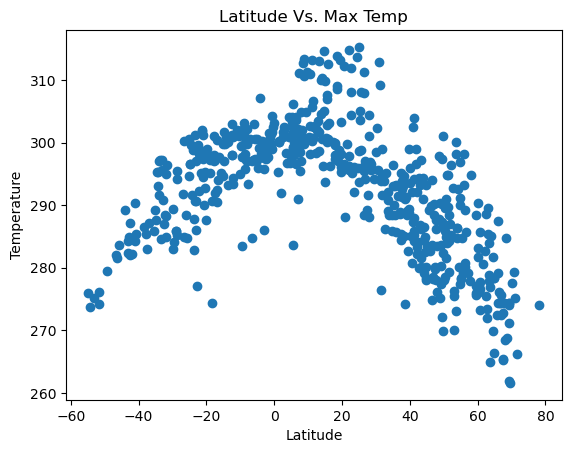

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
plt.title("Latitude Vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

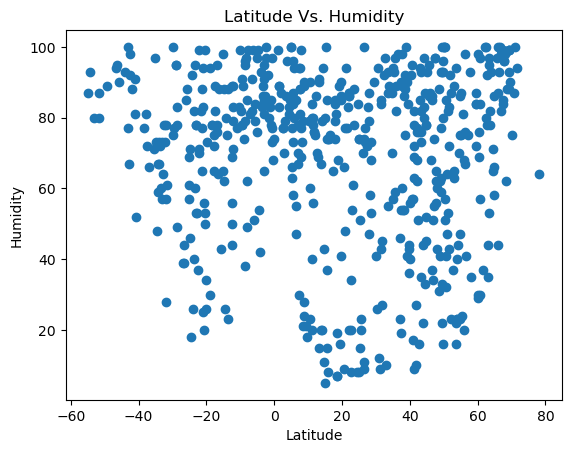

In [38]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

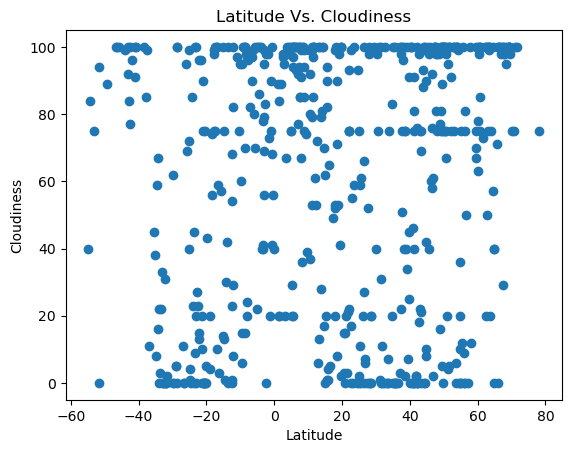

In [39]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Incorporate the other graph properties
# ______

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

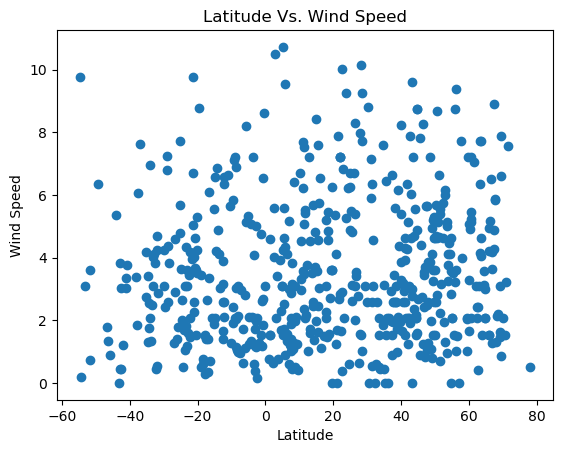

In [40]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linreg(x,y):
    slope, intercept, r, p, se = linregress(x, y)
    reg_val = x*slope + intercept
    plt.plot(x,reg_val,"r-")
    plt.show()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,whitehorse,60.7161,-135.0538,276.58,57,75,5.14,CA,1683628533
1,iqaluit,63.7506,-68.5145,265.00,78,20,4.63,CA,1683628534
4,labytnangi,66.6572,66.4183,274.36,100,100,6.50,RU,1683628534
5,longyearbyen,78.2186,15.6401,274.06,64,75,0.51,SJ,1683628534
8,kingston,17.9970,-76.7936,299.68,85,20,3.09,JM,1683628535


In [49]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,273.80,93,84,0.18,GS,1683628534
3,ancud,-41.8697,-73.8203,282.21,88,96,1.21,CL,1683628371
6,vila velha,-20.3297,-40.2925,295.34,99,75,1.54,BR,1683628535
7,puerto ayora,-0.7393,-90.3518,299.01,97,68,2.68,EC,1683628535
9,balikpapan,-1.2675,116.8289,300.70,83,20,1.54,ID,1683628536


###  Temperature vs. Latitude Linear Regression Plot

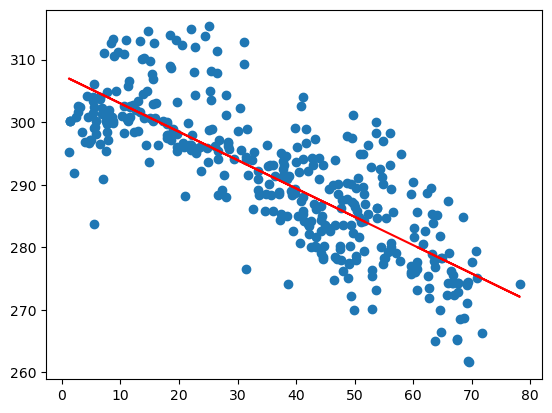

In [61]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
reg_line =linreg(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])



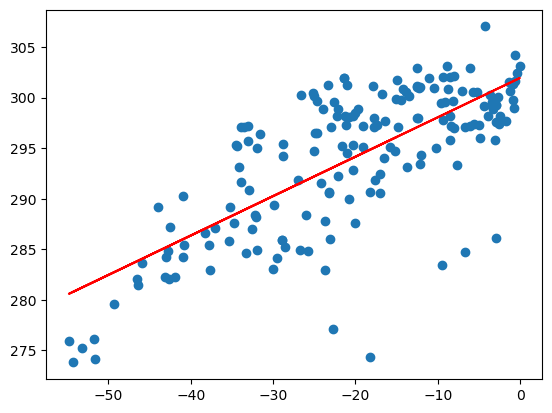

In [63]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
linreg(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** Both the max temperature data for the northern and southern hemisphere are highly correlated to latitude. As you look farther north in latitude, the max_temp decreases, and as you go farther south, the max_temp increases.

### Humidity vs. Latitude Linear Regression Plot

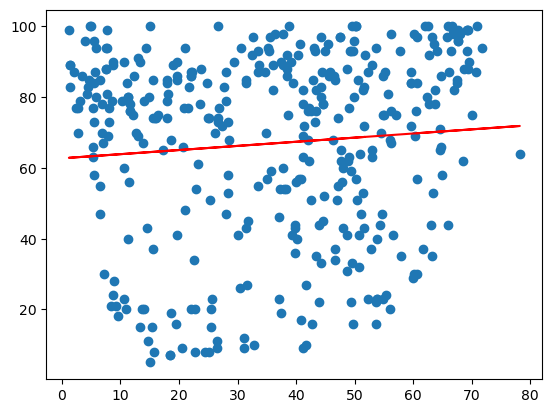

In [64]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
reg_line =linreg(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

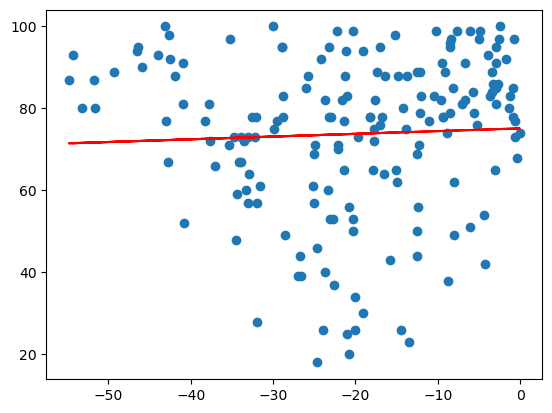

In [65]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
reg_line =linreg(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** There is a very weak correlation between humidity and latitude for both the northern and southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

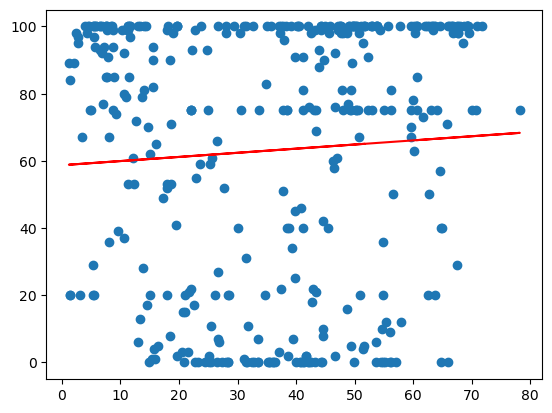

In [66]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
reg_line =linreg(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

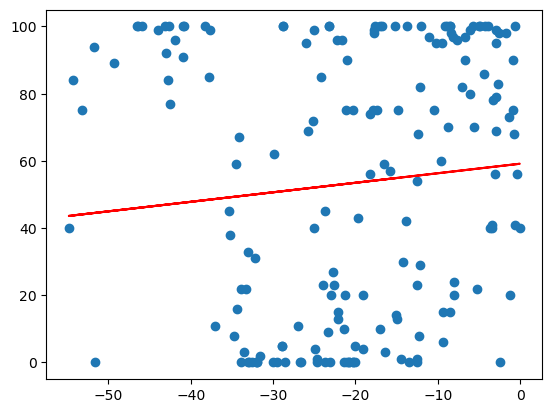

In [67]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
reg_line =linreg(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** For the plots of humidity versus latitude, there is even less of a correlation between the two variables.

### Wind Speed vs. Latitude Linear Regression Plot

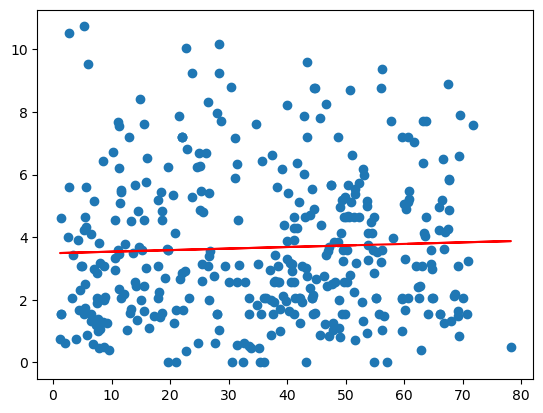

In [68]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
reg_line =linreg(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

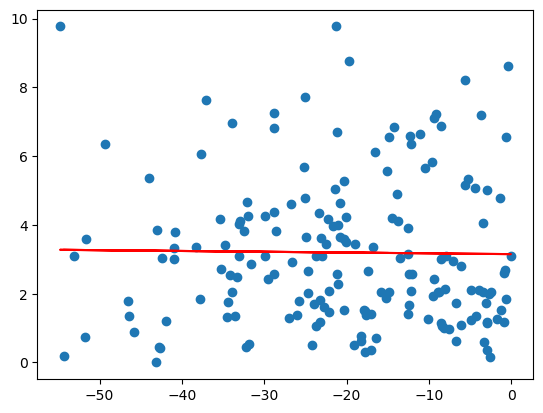

In [69]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
reg_line =linreg(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** These two variables are slightly more correlated than cloudiness, similar to plot and correlation of latitude to humidity.